<a href="https://colab.research.google.com/github/dyjdlopez/linearAlgebra2021/blob/main/Week%2011%20-%20Eigen-things/LinAlg_Lab_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Algebra for CpE
## Laboratory 13 : Eigen-things

We are now going to use the cumulative concepts of matrix algebra, systems of linear equations, and linear transformations to understand the concept and applications of solving for eigenvalues and eigenvectors. 

### Objectives
At the end of this activity you will be able to:
1. Be familiar with the concept of eigen-stuffs.
2. Solve for eigen values and eigen vectors.
3. Write eigen-solutions in Python code.

## Discussion

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Eigen

In our lesson, <b>eigen</b> does not denote famous actors but rather coming from a German etymology meining "characteristic". So we can say in analogy, that solving for the <b>eigen</b> of anything is finiding their characteristics.

### Eigenvectors

Referring to our definition of eigen earlier, we can deduct that eigenvectors are characteristic vectors or representative vectors of a matrix. In the more technical sense, these are vectors that can be considered constant/unchanging even when a linear transformation. So whether if we do any geometric translation, that vector in the span of the matrix will not translate to a different vector but rather just scale —meaning it is linearly dependent from its original vector.

So for example we'll have a matrix $x$ wherein we apply a matrix transformation $F$ it gives us a resulting vector $A$.
$$F\cdot x = A$$
So in matrix $x$ there would exist a vector $v$ upond having a reultant matrix $A$ it will just be a scalar transform of itself (eigenvector). We can denote the scaling factor as $\lambda$. We can then define the eigenvector as:
$$A\cdot v = \lambda * v$$

In [ ]:
def plot_quiv(x,y=None,eig=None):
    size= (5,5)
    plt.figure(figsize=(4,4))
          
    plt.xlim(-size[0],size[0])
    plt.ylim(-size[1],size[1])
    plt.xticks(np.arange((-size[0]), size[0]+1, 1.0))
    plt.yticks(np.arange((-size[1]), size[1]+1, 1.0))
    
    plt.quiver([0,0],[0,0], x[0,:], x[1,:], 
               angles='xy', scale_units='xy',scale=1, 
               color=['red','red'], label='Original Vector')## use column spaces
    if y is not None:
        plt.quiver([0,0],[0,0], y[0,:], y[1,:], 
               angles='xy', scale_units='xy',scale=1, 
               color=['blue','blue'], label='Transformed Vector')## use column spaces
    if eig is not None:
        c = np.arange(-10,10,0.25)
#         plt.plot(c*eig[0,0],c*eig[1,0], color='orange') 
        plt.plot(c*eig[0,1], c*eig[1,1], color='orange', label='Eigenspace') 
        plt.plot(c*eig[0,0],c*eig[1,0], color='orange') 
        
        plt.plot(c*eig[0,0], c*eig[0,1], color='orange', label='Eigenspace') 
        plt.plot(c*eig[1,0],c*eig[1,1], color='orange') 

        
    plt.grid()
    plt.legend()
    plt.show()

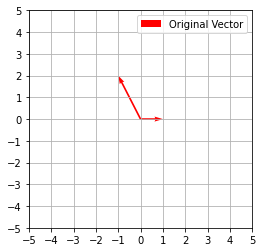

In [ ]:
## Let's try to determine that manually
x = np.array([
    [1,-1],
    [0,2]
])
plot_quiv(x)

[[2. 1.]
 [0. 2.]]


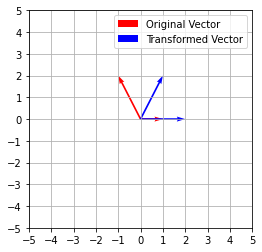

In [ ]:
F = np.array([
    [2, 1.5],
    [0, 1]
])
A = F@x
print(A)
plot_quiv(x,A)

In the linear transformation above, we can see that the first vector (red) did not shift or rotate to any other coordinate in the 2D space. We can say that the first vector is an eigenvector since it remains on its span even if a linear transformation is applied. But do note there could be more than one eigenvector for a matrix, and most of the times these vectors cannot be identified through visual inspection. We can try to solve this using the formula we set above.
$$(A \cdot v) - (\lambda * v) = 0 $$
$$(A-\lambda)\cdot v = 0$$
Assuming that $v$ is non-zero, well try to solve for $A-\lambda$ in which it will equate to 0. Take note that $A$ is a vector and $\lambda$ is a scalar. 

Initially we cannot perform a matrix and lambda subtraction (except considering Broadcasting), with that we must turn $\lambda$ from a scalar to a scalar matrix by multiplying it with $I$.So if we have $A = \begin{bmatrix} a & b \\ c & d\end{bmatrix}$ and a scalar matrix $\lambda$ as $\begin{bmatrix}\lambda & 0 \\ 0 & \lambda\end{bmatrix}$ we would have:
$$A - \lambda = \begin{bmatrix}a-\lambda & b \\ c & d-\lambda\end{bmatrix}$$


Now, what's left would be solving for $\lambda$s wherein $(A - \lambda) \cdot v = 0$. Since the requirement is that transformation of the vector is that it would stay on the same span, it is a <b>linearly dependent vector</b>. Recalling one of the methods to determine linearly depenent vectors is when their determinant is equal to zero. So we can say in our case:
$$det(A-\lambda) \cdot v = 0\\ \mbox{or} \\ det \left( \begin{bmatrix}a-\lambda & b \\ c & d-\lambda\end{bmatrix} \right) = 0$$
By solving for the determinant we will have a polynomial equation:
$$(a-\lambda)(d-\lambda) - cb = 0 \\ ad - d\lambda - a\lambda + \lambda^2 - cb = 0 \\ \mbox{or} \\ \lambda^2 - ad(\lambda) + ad -cb = 0 \\ \lambda^2 - (a+d)\lambda + ad - cb = 0$$
We can then solve for $\lambda$ by getting the root of the polynomial. The roots that would be find are the <b>eigenvalues</b>.

So given $A$ earlier as $\begin{bmatrix}2 & 1 \\ 0 & 2\end{bmatrix}$ we can try to solve for the eigenvalues as
$$det \left( \begin{bmatrix}2-\lambda & 1 \\ 0 & 2-\lambda\end{bmatrix} \right) = 0$$
The eigenvalues could then be solved as:
$$ \lambda^2 - (a+d)\lambda + det(A) = 0 $$
$$ \lambda^2 - 4\lambda + 4 = 0 $$
You can use the quadratic formula to solve for the roots of the polymial. But for ease of discussion we'll use the `np.roots()` function.

In [ ]:
coeff = [1,-4,4]
eigvals = np.around(np.roots(coeff),3)
eigvals

array([2., 2.])

The next step would be re-substituting both $\lambda$ in to the $A-\lambda = 0$ equation, that would yield

Lastly, to solve for the <b>eigenvectors</b> we need to solve these matrices as system of linear equations equating to 0.

In [ ]:
eigm1 = A-(eigvals[0]*np.eye((2))).astype("int32")
print(eigm1)
# eigm2 = A-(eigvals[1]*np.eye((2))).astype("int32")
# print(eigm2)

[[0. 1.]
 [0. 0.]]


Beyond this point this requires sophisticated algorithms to perfrom programatically such as power iterations. It could be assumed that solving the eigenvectors was already demonstrated during the lecture. <br>
But then again, we can implement this simpler using built in NumPy functions

[2. 2.]
[[ 1.0000000e+00 -1.0000000e+00]
 [ 0.0000000e+00  4.4408921e-16]]


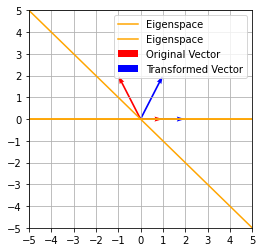

In [ ]:
eigval, eigvect = np.linalg.eig(A)
print(eigval)
print(eigvect)
plot_quiv(x,A,eig=eigvect)

In [ ]:
def plot_tr_eig(inp, trans, eig, q1=False):
    c1 = np.arange(-5, 5, 0.5)
    c2 = np.arange(-5, 5, 0.5)
    if q1:
        c1 = np.arange(0, 5, 0.5)
        c2 = np.arange(0, 5, 0.5)    
    X,Y= np.meshgrid(c1, c2)
    v = np.array([X.flatten(),Y.flatten()])
    A = F@inp@v   

    fig, ax = plt.subplots()    
    size= (5,5)
    fig.set_size_inches(10,10)
          
    ax.set_xlim(-size[0],size[0])
    ax.set_ylim(-size[1],size[1])
    ax.set_xticks(np.arange((-size[0]), size[0]+1, 1.0))
    ax.set_yticks(np.arange((-size[1]), size[1]+1, 1.0))    
    if q1:
        ax.set_xlim(0,size[0])
        ax.set_ylim(0,size[1])
        ax.set_xticks(np.arange(0, size[0]+1, 1.0))
        ax.set_yticks(np.arange(0, size[1]+1, 1.0))
    q = ax.quiver(X, Y,
                  A[0,:].reshape(int(np.sqrt(A[0,:].size)), int(np.sqrt(A[0,:].size))), 
                  A[1,:].reshape(int(np.sqrt(A[1,:].size)), int(np.sqrt(A[1,:].size))),
                 color='royalblue')
    ax.quiverkey(q, X=0.3, Y=1.1, U=10,
                 label='Quiver key, length = 10', labelpos='E')    
    if eig is not None:
        c = np.arange(-20,20,0.25)
        plt.plot(c*eig[0,1],c*eig[0,0], color='orange') 
        plt.plot(c*eig[1,1], c*eig[1,0], color='orange', label='Eigenvector') 

    plt.show()

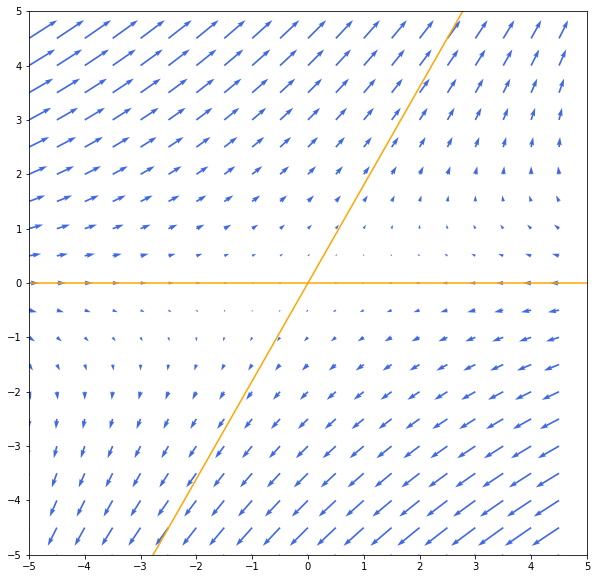

In [ ]:
x = np.array([
    [1,0],
    [0,1]
])
F = np.array([
    [-1,2],
    [0,2]
])
eigval, eigvect = np.linalg.eig(F@x)
plot_tr_eig(x,F,eigvect)

## Practice

A direct way applying eigenvalues and eigenvectors is through differential equations or determining rate of change between variables. Let's say we want to determine the probabilty of surviving a pandemic or how long till the number of victims and healthy people meet equilibirium. Let's say we have a pandemic named the "Pink Plague". We can characterize the infection rate and recovery rate as follows:

$\mbox{Let} : \\ 
\mbox{Healthy} = 1-\frac{dI}{dt} + \frac{dR}{dt} \\
\mbox{Infected} = \frac{dI}{dt} + 1-\frac{dR}{dt} \\
\frac{dI}{dt} = 30\% \\
\frac{dR}{dt} = 80\% \\
\mbox{Healthy}_{population} = 70\%H + 80\%I \\
\mbox{Infected}_{population} = 30\%H + 20\%I$

This will give us a system of linear equation with a linear transformation as a Markov Matrix characterizing the state of the human population:

$$
\begin{bmatrix}0.70 & 0.80 \\ 0.30 & 0.20\end{bmatrix} \begin{bmatrix}H_0 \\ I_0\end{bmatrix} = \begin{bmatrix}H_f \\ I_f\end{bmatrix}$$

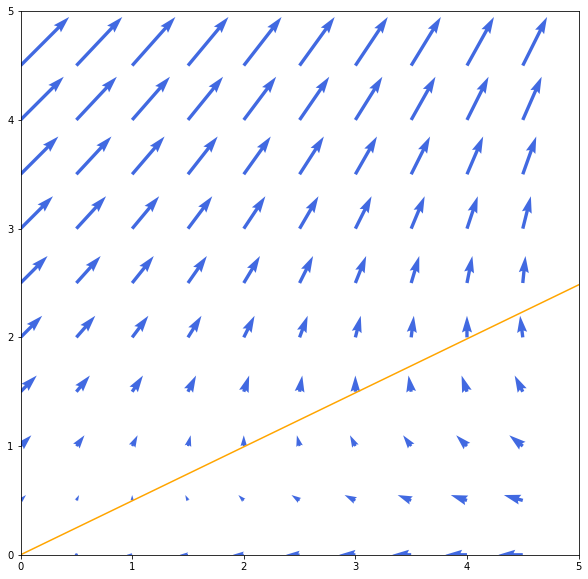

In [ ]:
init = np.eye(2) #represents initial population by 1:100
# print(init)
rate = np.array([
    [0.7, 0.8],
    [0.3, 0.2]
])
eigvals, equilibrium= np.linalg.eig(rate@init)
# print(equilibrium)

plot_tr_eig(init,rate,equilibrium, q1=True)

## Supplementary Activity

Try to implement your own function for solving eigenvalues.

### Conclusion

As a conclusion briefly explain the essence of eigenvectors and eigenvalues. Additionally, cite an example of using eigenvalues and eigenvectors in social sciences.